In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML
print("Setup Complete")

Setup Complete


In [2]:
data = pd.read_excel('/kaggle/input/lamborghini-sales-and-stocks/LamboData.xlsx')

data.head(5)

,Year,Sales,Growth,Open,High,Low,Close
0,2006,2087,NaN,5.50,11.30,5.50,11.30
1,2007,2406,15.285098,11.80,26.30,11.80,23.05
2,2008,2430,0.997506,22.43,51.13,22.00,35.90
3,2009,1515,-37.654321,34.48,37.50,11.18,11.18
4,2010,1302,-14.059406,10.75,15.38,8.49,14.80


In [3]:
def scroll_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [4]:
def make_data_table(dataset, title):
    graph = dataset.select_dtypes(include=[np.number])
    info_graph = scroll_table(dataset, 'graph_data_2', title)
    display(HTML(info_graph))
    return make_data_table

make_data_table(data, 'Data')

,Year,Sales,Growth,Open,High,Low,Close
0,2006,2087,NaN,5.50,11.30,5.50,11.30
1,2007,2406,15.285098,11.80,26.30,11.80,23.05
2,2008,2430,0.997506,22.43,51.13,22.00,35.90
3,2009,1515,-37.654321,34.48,37.50,11.18,11.18
4,2010,1302,-14.059406,10.75,15.38,8.49,14.80
5,2011,1602,23.041475,15.04,19.58,12.40,13.35
6,2012,2083,30.024969,14.03,21.31,14.03,21.31
7,2013,2121,1.824292,21.96,26.97,17.70,26.97
8,2014,2530,19.283357,26.28,26.80,19.73,22.17
9,2015,3245,28.260870,21.06,25.91,12.84,15.49


<function __main__.make_data_table(dataset, title)>

In [5]:
data.shape

(18, 7)

In [6]:
data.columns

Index(['Year', 'Sales', 'Growth', 'Open ', 'High', 'Low', 'Close'], dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


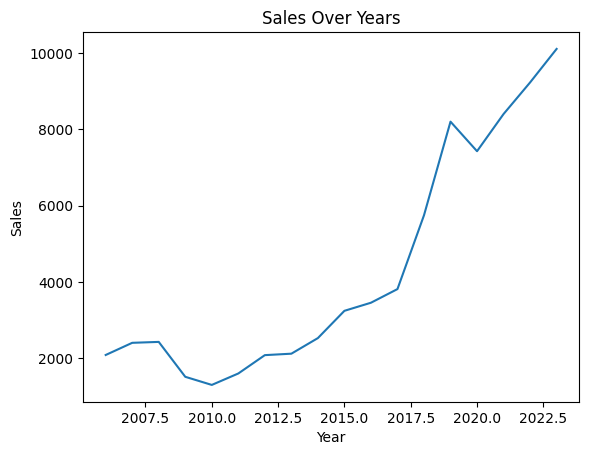

In [7]:
sns.lineplot(data,x='Year',y="Sales")
plt.title("Sales Over Years");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


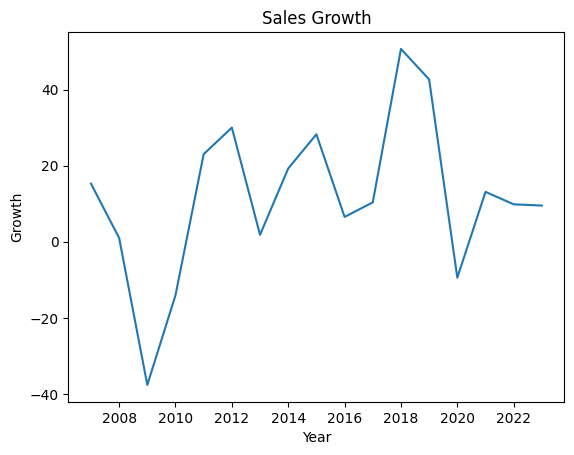

In [8]:
sns.lineplot(data,x='Year',y="Growth")
plt.title("Sales Growth");

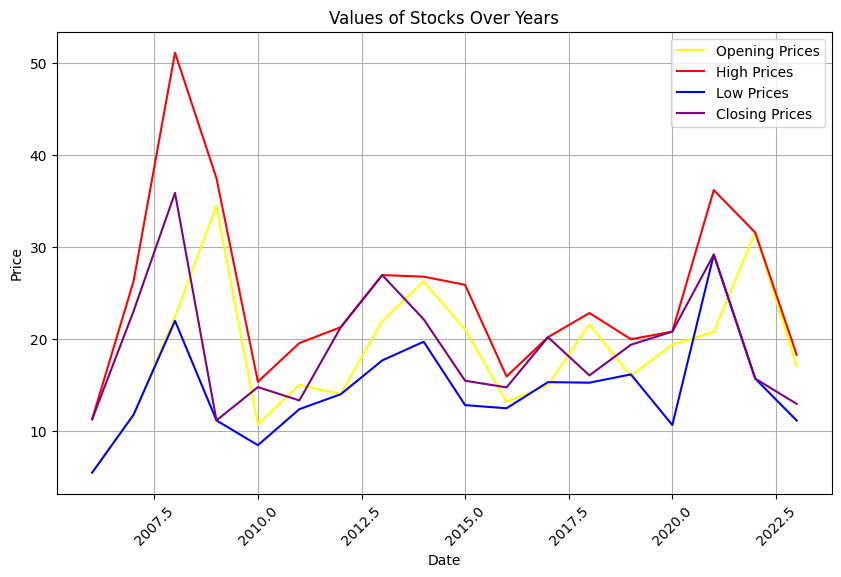

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Open '], color='yellow',label = 'Opening Prices')
plt.plot(data['Year'], data['High'], color='red', label = 'High Prices')
plt.plot(data['Year'], data['Low'], color='blue', label = 'Low Prices')
plt.plot(data['Year'], data['Close'], color='purple', label = 'Closing Prices')
plt.title('Values of Stocks Over Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [10]:
model = LinearRegression()

# Fit the model to the data
model.fit(data[['Year']], data['Sales'])

# Generate future years starting from the next year after the maximum year in the dataset
future_years = np.array([[year] for year in range(data['Year'].max() + 1, data['Year'].max() + 50)])

# Predict the future of the target column for the specified future years
future_target = model.predict(future_years)

# Calculate growth percentage
last_known_sales = data['Sales'].iloc[-1]
percent_growth = ((future_target - last_known_sales) / last_known_sales) * 100

# Create a DataFrame with future years as the index column and the predicted target values
future_df = pd.DataFrame({'Sales': future_target.flatten(), 'Growth': percent_growth.flatten()}, index=future_years.flatten())
future_df.index.name = 'Year'

print(future_df)

             Sales      Growth
Year                          
2024   9084.065359  -10.165493
2025   9585.733058   -5.204380
2026  10087.400757   -0.243268
2027  10589.068455    4.717845
2028  11090.736154    9.678957
2029  11592.403853   14.640070
2030  12094.071551   19.601182
2031  12595.739250   24.562295
2032  13097.406949   29.523407
2033  13599.074647   34.484520
2034  14100.742346   39.445632
2035  14602.410045   44.406745
2036  15104.077743   49.367857
2037  15605.745442   54.328970
2038  16107.413141   59.290082
2039  16609.080839   64.251195
2040  17110.748538   69.212308
2041  17612.416237   74.173420
2042  18114.083935   79.134533
2043  18615.751634   84.095645
2044  19117.419333   89.056758
2045  19619.087031   94.017870
2046  20120.754730   98.978983
2047  20622.422429  103.940095
2048  21124.090127  108.901208
2049  21625.757826  113.862320
2050  22127.425525  118.823433
2051  22629.093223  123.784545
2052  23130.760922  128.745658
2053  23632.428621  133.706770
2054  24

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


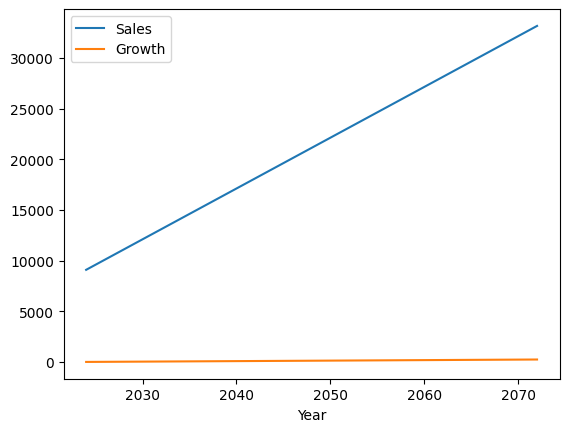

In [11]:
lines = future_df.plot.line()

In [12]:
future_df.to_csv('Lambo-Future.csv', index=False)
print("Output Generated Successfully")

Output Generated Successfully
